In [1]:
import sys
sys.path.append('../src')

%load_ext autoreload
%autoreload 2

In [2]:
from ane import ANE
from hub.fcn import FCN

ane = ANE()
model = FCN(ane)

/usr/lib/python3.10/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


(1026, 1282, 3)


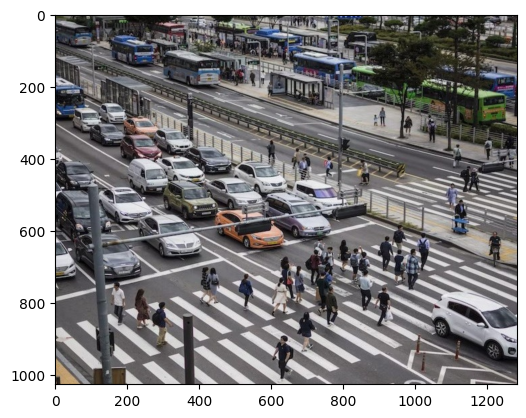

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("data/fcn-input.jpg")[:,:,::-1]
print(img.shape)
plt.imshow(img); plt.show()

In [4]:
inarr = model.preprocess(img)
input = model.tile([inarr])


In [5]:
outputs = model.predict(input)


In [6]:
outarrs = model.untile(outputs)
pred = model.postprocess(outarrs)
print(pred.shape)

(1, 21, 129, 161)


In [7]:
import torch
import numpy as np

m = torch.nn.Upsample(scale_factor=7.963, mode='bilinear')
tensor = torch.from_numpy(pred.astype(np.float32))
upscaled = m(tensor).numpy()
print(upscaled.shape)

(1, 21, 1027, 1282)


In [8]:
mask = upscaled.squeeze().argmax(0)[:1026]
print(mask.shape)

(1026, 1282)


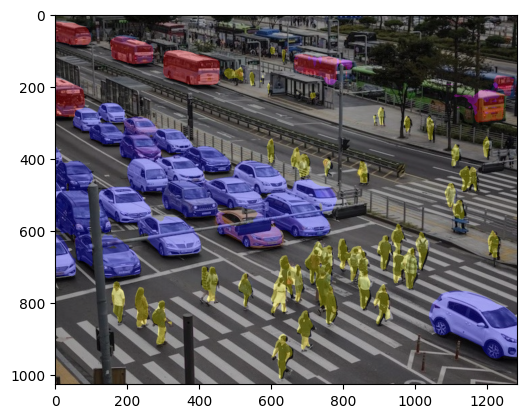

In [9]:
import skimage

canvas = skimage.color.label2rgb(mask, img, saturation=1, alpha=0.29)
canvas = np.round(canvas * 255).astype(np.uint8)
plt.imshow(canvas)
plt.show()

In [10]:
#cv2.imwrite("res/fcn.jpg", canvas[:,:,::-1])